# Midterm 1 Review Answers

Complete the following questions.

### Standard imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from mpmath import mp, iv

### 1. Working with lists.

Write a function `odd_sublist(lst)` which takes as input a list `lst` of integers and returns a list containing only the odd integers, in the same order.

In [2]:
def odd_sublist(lst):
    new_lst = []
    for n in lst:
        if n%2 == 1:
            new_lst.append(n)
    return new_lst

In [3]:
# Tests: Should not produce errors
assert odd_sublist([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) == [1, 3, 5, 7, 9]
assert odd_sublist([1, 1, 2, 3, 5, 8, 13, 21]) == [1, 1, 3, 5, 13, 21]
assert odd_sublist([101, 1001, 10001]) == [101, 1001, 10001]
assert odd_sublist([2, 4, 8, 16, 32, 64]) == []

### 2. Volume of a cylinder

Write a function `cylinder_volume(r, h)` which returns the volume of a cylinder of radius $r>0$ and height $h>0$.

In [4]:
def cylinder_volume(r, h):
    return m.pi * r**2 * h 

In [5]:
# Tests that should be passed
assert abs(cylinder_volume(1, 1) - 3.141592653589793) < 10**-8
assert abs(cylinder_volume(0.5641895835477563, 5) - 5) < 10**-8
assert abs(cylinder_volume(10, 2) - 628.3185307179587) < 10**-8
assert abs(cylinder_volume(10, 10) - 3141.5926535897934) < 10**-8

### 3. Function plotting

Use `matplotlib` to plot the function $sin(\frac{1}{x})$ using $10001$ values of $x$ equally spaced in the interval $[0.00001, 1.00001]$.

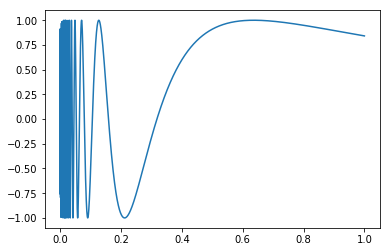

In [6]:
x = np.linspace(0.00001,1.00001,10001)
y = np.sin(1/x)
plt.plot(x,y)
plt.show()

<span style="color:blue">**Check your work:** Your plot should look something like this:</span>

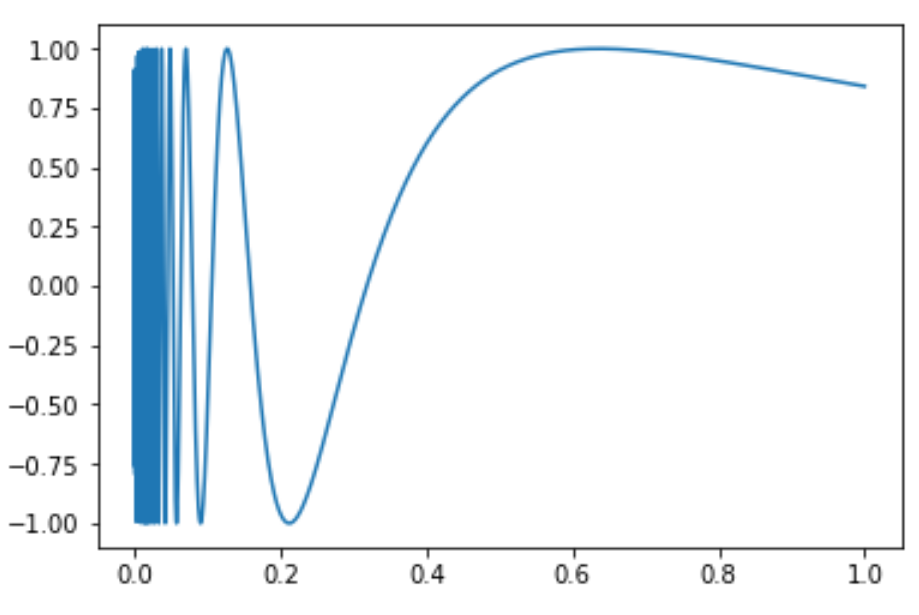

### 4. Counting the elements in a list.

Write a function `count_small_elements(lst, epsilon)` which takes as input a list `lst` of real numbers and an $\epsilon>0$, and returns the number of real numbers $x$ in `lst` such that $|x|<\epsilon$. 

For example `count_small_elements([0.1, 0.5, 1.1, 2], 1)` should return $2$.

In [7]:
def count_small_elements(lst, epsilon):
    count = 0
    for x in lst:
        if abs(x) < epsilon:
            count += 1
    return count

In [8]:
assert count_small_elements([0.1, 0.5, 1.1, 2], 1) == 2
assert count_small_elements(list(range(100)), 50) == 50
assert count_small_elements([x/4 for x in range(-100,101)], 3.7) == 29

### 5. Evaluating a series

Consider the series $$\sum_{k=0}^\infty \frac{1}{1+\sqrt{k}}.$$
Let $S_N$ be the partial sum consisting of the sum of the first $N$ terms. 
Compute the smallest $N$ such that 
$$|S_N - S_{N-1}| < \frac{1}{30 \pi}.$$
Store the value of $N$ in the variable `N_stop` and store the value of $S_N$ in the variable `partial_sum_stop`

In [9]:
N = 0
prior_sum = 0.0 # Will store the sum with k in [0, N-1]
current_sum = 1.0 # Will store the sum with k in [0, N]
while abs(current_sum - prior_sum) >= 1 / (30*m.pi):
    N += 1
    prior_sum = current_sum
    current_sum += 1 / (1+m.sqrt(N))
N_stop = N
partial_sum_stop = current_sum

In [10]:
N_stop

8696

In [11]:
partial_sum_stop

178.06448435340366

In [12]:
assert N_stop == 8696, "N_stop is wrong."
assert (partial_sum_stop - 178.06448) < 10**-3, "partial_sum_stop is wrong."

### 6. Working with different bases

Write a function `base7(n)` which takes as input an integer $n > 0$ and converts it to a string storing its representation in base $7$. The returned string will consist only of the characters in the set $\{0,1,2,3,4,5,6\}$.

For example, the number $67$ in base $7$ is is given by `124` since
$$67 = 1 \cdot 7^2 + 2 \cdot 7 + 4.$$
Thus `base7(67)` should return the string `'124'`.

In [13]:
def base7(n):
    value = n
    s = ""
    while value != 0:
        s = str(value % 7) + s
        value = value // 7
    return s

In [14]:
# Tests
assert base7(6) == '6', 'Failed for n = 6.'
assert base7(49) == '100', 'Failed for n = 49.'
assert base7(67) == '124', 'Failed for n = 67.'
assert base7(151235) == '1166630', 'Failed for n = 151235.'
assert base7(6723477342423466) == '4062124131215314042', 'Failed for n = 6723477342423466.'

### 7. Rigorous comparisons

Write a function `root_difference_less_than(n, p, q)` which takes as input integers $n$, $p$, and $q$ and returns `True` if 
$$\sqrt{n} - \sqrt[3]{n} < \frac{p}{q}.$$
The function should return `False` if the inequality is not true. You can assume that $q \neq 0$ and that the quantity $\sqrt{n} - \sqrt[3]{n}$ is irrational (i.e., that it can not be true that $\sqrt{n} - \sqrt[3]{n}=\frac{p}{q}$.)

Use interval arithmetic at increasing precision to be sure that your answer is always correct, even if the integers involved are very large.

For example `root_difference_less_than(27, 2, 1)` should return `False` since $\sqrt{27} \in (5,6)$ while $\sqrt[3]{27}=3$. Thus $\sqrt{n} - \sqrt[3]{n}$ lies in the interval $(2,3)$, and we are comparing to the fraction $2/1$.

In [15]:
def root_difference_less_than(n, p, q):
    # Initialize the precision
    iv.prec = 5
    answer = None
    while answer is None:
        # increase the precision
        iv.prec += 5
        # recompute the answer
        left_side = iv.mpf(n)**(1/2) - iv.mpf(n)**(1/3)
        right_side = iv.mpf(p) / iv.mpf(q)
        # print("{} < {}".format(left_side, right_side))
        answer = (left_side < right_side)
    return answer

In [16]:
assert not root_difference_less_than(27, 2, 1)
assert root_difference_less_than(27, 9, 4)
assert not root_difference_less_than(2, 39167, 253849)
assert not root_difference_less_than(3, 266312747, 918949655)
assert not root_difference_less_than(5, 3503460365364981558547916427985849, 
                                     6659405883574539501104899156429155)
assert not root_difference_less_than(6, 
    12937268231607778583821492269711419883137751358, 
    20458411408288108829612787097012200189720135111)

### 8. Significant digits

Find the value of $\frac{22}{7} - \pi$ to $20$ significant digits. Store the answer as a string in the variable `pi_approx_difference`. Do not use exponential notation.

Your answer should differ be within one least significant digit from the true value. Note the true value has the form $0.00126\ldots$, so differing by one least significant digit means that `abs(\frac{22}{7} - pi - pi_approx_difference)` should be less than $10^{-22}$.


<span style="color: blue">First, we do a rough calculation using the math library to figure out how accurate our answer needs to be.</span>

In [17]:
22/7 - m.pi

0.0012644892673496777

<span style="color: blue">Observe that the most significant digit is in the thousandths place (has value $10^{-3}$), so the least significant digit of $20$ significant digits will have value $10^{-22}$. To guarantee we get the last digit correct, we want to find a bound on the quantity by an interval of length less than $10^{-22}$.</span>

In [18]:
iv.prec = 5
value = iv.mpf(22)/iv.mpf(7) - iv.pi
while value.delta > 10**-22:
    iv.prec += 5
    value = iv.mpf(22)/iv.mpf(7) - iv.pi
value

mpi('0.0012644892673496186802112518', '0.0012644892673496186802178693')

<span style="color: blue">Here we will print the width to be sure we have the desired accuracy:</span>

In [19]:
value.delta

mpi('6.6174449004242213989712695e-24', '6.6174449004242213989712695e-24')

<span style="color: blue">Here we print the interval, rounded to 20 significant digits:</span>

In [20]:
s = iv.nstr(value,20)
s

'[0.0012644892673496186802, 0.0012644892673496186802]'

<span style="color: blue">We can pull out the first number in the pair as a string using slice notation for a substring:</span>

In [21]:
pi_approx_difference = s[1:25]
pi_approx_difference

'0.0012644892673496186802'

In [22]:
# Tests:
# The correct answer is '0.0012644892673496186802' but nearby answers are acceptable:
assert '0.0012644892673496186802' == pi_approx_difference or \
    '0.0012644892673496186801' == pi_approx_difference or \
    '0.0012644892673496186803' == pi_approx_difference

### 9. ArcTan

Inverse tangent is an analytic function. It's Taylor series centered at the origin is given by $$\tan^{-1}(x) = x - \frac{x^3}{3} + \frac{x^5}{5} - \frac{x^7}{7} +\ldots.$$
This series converges for values of $x \in [-1,1]$.

Write a function `arctan_partial_sum(x, d)` which takes as input a float $x \in [-1,1]$ and an integer $d$ and returns the Taylor polynomial of degree $d$ evaluated at $x$. Use Python's built in floats to carry out the calculation.

<span style="color: blue">The key thing is to understand the coefficients of the Taylor series. The following function gives the coefficient of degree d.</span>

In [23]:
def arctan_coef(d):
    if d % 2 == 0:
        return 0
    if d % 4 == 1:
        return 1/d
    if d % 4 == 3:
        return -1/d

<span style="color: blue">To check it, lets print out a few.</span>

In [24]:
for d in range(10):
    print("{} * x^{}".format(arctan_coef(d),d))

0 * x^0
1.0 * x^1
0 * x^2
-0.3333333333333333 * x^3
0 * x^4
0.2 * x^5
0 * x^6
-0.14285714285714285 * x^7
0 * x^8
0.1111111111111111 * x^9


In [25]:
def arctan_partial_sum(x, d):
    total = 0.0
    k = 0
    x_power = 1.0 # will always store x^k
    while k <= d:
        total += arctan_coef(k) * x_power
        k += 1
        x_power *= x
    return total

In [26]:
arctan_partial_sum(1,100)

0.7803986631477527

In [27]:
arctan_coef(1)

1.0

In [28]:
assert abs(arctan_partial_sum(0.5, 0)) < 10**-8, "Error with input (0.5, 0)."
assert abs(arctan_partial_sum(0.3,1)-0.3) < 10**-8, "Error with input (0.3,1)."
assert abs(arctan_partial_sum(0.7,2)-0.7) < 10**-8, "Error with input (0.7,2)."
assert abs(arctan_partial_sum(0.5,10)-0.46368427579365) < 10**-8, \
    "Error with input (0.5,10)."
assert abs(arctan_partial_sum(1,100) - 0.7803986631477527) < 10**-8, \
    "Error with input (1,100)."

### 10. ArcTan, continued

The usual form for the remainder in the Taylor series is not immediately useful, since it requires us to control high order derivatives of $\tan^{-1}$. 

However, observe that the degree $d$ term of the Taylor series for $\tan^{-1}$ has absolute value less than $|x|^d$. Thus the remainder $R_d(x)-\tan^{-1}(x)$ satisfies
$$-\sum_{k=d+1}^\infty |x|^k < R_d(x) < \sum_{k=d+1}^\infty |x|^k.$$
Observe that $\sum_{k=d+1}^\infty |x|^k$ is a geometric series and can be evaluated by a standard formula.

Write a function `arc_tan_degree(x, epsilon)` which takes as input an $x \in (-1,1)$ and an $\epsilon>0$ and returns an integer $d$ such that $|R_d(x)|<\epsilon$.

Use your function to compute $\tan^{-1}(\frac{1}{2})$ correct to $8$-significant digits. Store the result as a float in the variable `arc_tan_half`.

You can use floats and ignore the effects of round off error.

<span style="color: red">**Remark:** This problem would be too hard and time consuming for a test, but it is still good practice.</span>

<span style="color: blue">First we consider `arc_tan_degree(x, epsilon)`. As noted in the problem description, we want to guaranee that $|R_d(x)|<\epsilon$. We know 
$$|R_d(x)|<\sum_{k=d+1}^\infty |x|^k,$$
so it suffices to guarantee that $\sum_{k=d+1}^\infty |x|^k<\epsilon$. The series is convergent because $|x|<1$. Recall the trick to evaluate a convegent geometric series. Let $y=\sum_{k=d+1}^\infty |x|^k$. Then $$y + |x|^d=\sum_{k=d}^\infty |x|^k.$$
Multiplying through by $|x|$ yields
$$|x| ( y + |x|^d ) = \sum_{k=d+1}^\infty |x|^k.$$
Thus, $|x| ( y + |x|^d )=y$. Solving for $y$, we find
$$y=\frac{|x|^{d+1}}{1 - |x|}.$$
We want to find a $d$ so that $y<\epsilon$. So, consider the expression 
$$\frac{|x|^{d+1}}{1 - |x|}<\epsilon.$$
This is equivalent to 
$$|x|^{d+1} < \epsilon (1-|x|).$$
Taking the logarithm of both sides yields
$$(d+1) \log |x| < \log \epsilon + \log (1-|x|).$$
Thus observe that $|x|<1$ so $\log |x|<0$. Therefore, by dividing through by $\log |x|$, we see that this is equivalent to
$$d+1 > \frac{\log \epsilon + \log (1-|x|)}{\log |x|}.$$
Thus, we can take $d$ to be the smallest non-negative integer greater than 
$$-1 + \frac{\log \epsilon + \log (1-|x|)}{\log |x|}.$$
That is 
$$d = \max \left\{0, \left\lfloor \frac{\log \epsilon + \log (1-|x|)}{\log |x|} \right\rfloor\right\},$$
where $\lfloor \star \rfloor$ denotes the largest integer less than $\star$.
</span>

In [29]:
def arc_tan_degree(x, epsilon):
    q = (m.log(epsilon) + m.log(1-abs(x))) / m.log(abs(x))
    degree = m.floor(q)
    if degree < 0:
        return 0
    else:
        return degree

<span style="color: blue">Now consider $\tan^{-1}(\frac{1}{2})$. First, lets look at the approximate answer, which we can get from the built in math library.</span

In [30]:
m.atan(1/2)

0.4636476090008061

<span style="color: blue">The most significant digit is the tenths place, so the $8$th most significant digit will have place value $10^{-8}$. So we want to bound the value inside an interval of size less than $10^{-8}$. To guarantee this, we take $\epsilon = 0.5 \times 10^{-8}$. (This is because the interval of solutions to $|x-\tan^{-1}(\frac{1}{2})|<\epsilon$ has length $2 \epsilon$.)</span>

In [31]:
d = arc_tan_degree(0.5, 0.5*10**-8)
d

28

<span style="color: blue">We use this value of `d` to compute our approximate `arc_tan_half`.</span>

In [32]:
arc_tan_half = arctan_partial_sum(0.5, d)
arc_tan_half

0.46364760894874296

<span style="color: blue">To be sure our answer is accurate, we can compare to the result found using the math library.</span>

In [33]:
abs(arc_tan_half - m.atan(0.5))

5.206313158367948e-11

<span style="color: blue">Assuming the math library answer is very close, our answer seems to be correct to about 10 decimal places.</span>

In [46]:
## Tests
assert abs(arc_tan_half - m.atan(0.5)) < 10**-8
assert arc_tan_degree(0.25, 100) == 0
assert abs(arctan_partial_sum(0.25, arc_tan_degree(0.25, 0.5*10**-4)) - m.atan(0.25)) < 10**-4
assert abs(arctan_partial_sum(0.75, arc_tan_degree(0.75, 0.5*10**-6)) - m.atan(0.75)) < 10**-6

### 11. Fibonacci numbers

The Fibonacci numbers are defined inductively by 
$F_0=1$, $F_1=1$ and 
$$F_{n+1}=F_n + F_{n-1} \quad \text{for all $n \geq 1$.}$$

Write a function `fibonacci(n)` which computes the number $F_n$ for integers $n \geq 0$.

The first few values are printed below:
$$F_0 = 1,~F_1 = 1,~F_2 = 2,~F_3 = 3,~F_4 = 5,~F_5 = 8,~F_6 = 13,~F_7 = 21,~F_8 = 34,~F_9 = 55.$$ 

In [35]:
def fibonacci(n):
    assert n >= 0
    if n==0 or n==1:
        return 1
    k = 1
    old = 1     # Will store F_{k-1}
    current = 1 # Will store F_k
    while k < n:
        next_number = old + current
        k += 1
        old = current
        current = next_number
    return current

In [36]:
# Printing to see it works
for n in range(10):
    print("F_{} = {}".format(n, fibonacci(n)))

F_0 = 1
F_1 = 1
F_2 = 2
F_3 = 3
F_4 = 5
F_5 = 8
F_6 = 13
F_7 = 21
F_8 = 34
F_9 = 55


In [37]:
# Tests
assert fibonacci(0) == 1
assert fibonacci(1) == 1
assert fibonacci(2) == 2
assert fibonacci(3) == 3
assert fibonacci(4) == 5
assert fibonacci(5) == 8
assert fibonacci(6) == 13
assert fibonacci(7) == 21
assert fibonacci(8) == 34
assert fibonacci(9) == 55
assert fibonacci(10) == 89
assert fibonacci(11) == 144
assert fibonacci(12) == 233
assert fibonacci(13) == 377
assert fibonacci(14) == 610
assert fibonacci(15) == 987
assert fibonacci(16) == 1597
assert fibonacci(17) == 2584
assert fibonacci(18) == 4181
assert fibonacci(19) == 6765
assert fibonacci(20) == 10946
assert fibonacci(21) == 17711
assert fibonacci(22) == 28657
assert fibonacci(23) == 46368
assert fibonacci(24) == 75025
assert fibonacci(25) == 121393
assert fibonacci(26) == 196418
assert fibonacci(27) == 317811
assert fibonacci(28) == 514229
assert fibonacci(29) == 832040

### 12. Inductive Proof

Inductively prove that if $n \geq 7$, then $F_n > 1.5^n$.

*Hint:* Show by computation that $F_7 > 1.5^7$ and $F_8 > 1.5^8$. Argue that if $F_n > 1.5^n$ and $F_{n-1} > 1.5^{n-1}$, then $F_{n+1} > 1.5^{n+1}$ using the fact that $F_{n+1}=F_n+F_{n-1}$.  

<p style="color: blue">We will follow the hint.</p></span>

<p style="color: blue">Below we check that the statement is true for $n=7$ and $n=8. This constitutes our base case.</p></span>

In [38]:
for n in [7, 8]:
    print("F_{} = {}, which is greater than 1.7^{} which is approximately {:.4g}." \
          .format(n,fibonacci(n),n,1.5**n))

F_7 = 21, which is greater than 1.7^7 which is approximately 17.09.
F_8 = 34, which is greater than 1.7^8 which is approximately 25.63.


<p style="color: blue">Now assume that $F_{n-1}>1.5^{n-1}$ and $F_{n}>1.5^{n}$. We must prove that $F_{n+1}>1.5^{n+1}$. Observe that
$$F_{n+1} = F_n + F_{n-1} > 1.5^{n} + 1.5^{n-1}.$$
We want to write the right-hand side in terms of $1.5^{n+1}$, so observe that $1.5^{n}= \frac{2}{3} (1.5^{n+1})$
and $1.5^{n-1}= \frac{4}{9} (1.5^{n+1})$. Plugging these values in, we see that 
$$F_{n+1} >  \frac{2}{3} (1.5^{n+1}) + \frac{4}{9} (1.5^{n+1})=\frac{10}{9} (1.5^{n+1})> 1.5^{n+1}.$$
This completes the inductive step. By the principle of mathematical induction, we know $F_n > 1.5^n$ for all $n \geq 7$.

### 13. Series involving Fibonacci numbers

Consider the series 
$$X = \sum_{n=0}^\infty \frac{1}{F_n}$$
where $F_n$ is the $n$th Fibonacci number. Let $S_N$ be the partial sum consisting of the first $N$ terms. Write a function `fibonacci_partial_sum(N)` which returns $S_N$. 

In [39]:
def fibonacci_partial_sum(N):
    total = 0.0
    for n in range(N): # n takes values in {0,1,...,N-1}
        total += 1 / fibonacci(n)
    return total

In [40]:
for N in range(1,10):
    print("S_{} = {}".format(N, fibonacci_partial_sum(N)))

S_1 = 1.0
S_2 = 2.0
S_3 = 2.5
S_4 = 2.8333333333333335
S_5 = 3.0333333333333337
S_6 = 3.1583333333333337
S_7 = 3.2352564102564108
S_8 = 3.282875457875458
S_9 = 3.3122872225813405


In [41]:
# Tests
assert abs(fibonacci_partial_sum(1) - 1.0) < 10**-8
assert abs(fibonacci_partial_sum(2) - 2.0) < 10**-8
assert abs(fibonacci_partial_sum(3) - 2.5) < 10**-8
assert abs(fibonacci_partial_sum(4) - 2.8333333333333335) < 10**-8
assert abs(fibonacci_partial_sum(5) - 3.0333333333333337) < 10**-8
assert abs(fibonacci_partial_sum(6) - 3.1583333333333337) < 10**-8
assert abs(fibonacci_partial_sum(7) - 3.2352564102564108) < 10**-8
assert abs(fibonacci_partial_sum(8) - 3.282875457875458) < 10**-8
assert abs(fibonacci_partial_sum(9) - 3.3122872225813405) < 10**-8

### 14. Approximation of series.

Use the fact that $F_n > 1.5^n$ for $n \geq 7$ to compute an upper bound on the remainder $R_N = X - S_N$ for value of $N \geq 7$.

Note that all terms are positive, so $R_N>0$. 

Use what you learned to write a function `series_approx(epsilon)` which takes as input an $\epsilon>0$ and returns a real number $Y$ such that $|X-Y|<\epsilon$ where $X=\sum_{n=0}^\infty \frac{1}{F_n}$.

*Hint:* If you know $R_N < 2 \epsilon$, then $S_N+\epsilon$ is within $\epsilon$ of the limit $X$ (i.e., $|X - (S_N+\epsilon)|<\epsilon$.)

You can use floating point arithmetic and ignore the effects of round of error.

Use your function to compute the value of $X$ to $8$ significant digits. Store the result as a float in the variable `X_approx`. 

<span style="color: blue; ">Observe that 
$$R_N = \sum_{n=N}^\infty \frac{1}{F_n}.$$
For $n \geq 7$, $F_n > 1.5^n$ and so $\frac{1}{F_n} < 1.5^{-n}$. Thus for $N \geq 7$,
$$R_N < \sum_{n=N}^\infty 1.5^{-n}=\sum_{n=N}^\infty \left(\frac{2}{3}\right)^{n}.$$
This is a convergent geometric series. Let $Y = \sum_{n=N}^\infty (\frac{2}{3})^{n}$. Then 
$$\frac{2}{3} Y = \sum_{n=N+1}^\infty (\frac{2}{3})^{n}$$
and
$$\frac{2}{3} Y + \left(\frac{2}{3}\right)^N= \sum_{n=N}^\infty \left(\frac{2}{3}\right)^{n}=Y.$$
Solving for $Y$, we see that 
$$Y = 3 \left(\frac{2}{3}\right)^N.$$
Thus we conclude that $R_N < 3 \left(\frac{2}{3} \right)^N$ assuming $N \geq 7$.
</span>

In [42]:
def series_bound(epsilon):
    N = 0
    remainder_bound = 3 # Will always store 3*(2/3)^N

    # Our remainder bound is only valid if N>=7, 
    # and we want the bound to be < 2*epsilon.
    while N<7 or remainder_bound >= 2*epsilon:
        N += 1
        remainder_bound *= 2/3
    
    S_N = fibonacci_partial_sum(N)
    # Following the hint:
    return S_N + epsilon

<p style="color: blue">Assuming our code is correct, we can get the value of $X$ to within $0.1$ as follows:</p> 

In [43]:
series_bound(0.1)

3.335256410256411

<p style="color: blue">This proves that the most sigificiant digit is in the ones place, so the 8th most significant digit will have place value $10^{-7}$. So to compute $X$ to $8$ significant digits, we want to bound $X$ to an interval of size $10^{-7}$. This corresponds to setting $\epsilon=\frac{1}{2} 10^{-7}$, (since the interval of values within $\epsilon$ of a given number has width $2 \epsilon$).

In [44]:
X_approx = series_bound(0.5*10**-7)
print("X_approx = {:.8g}".format(X_approx))

X_approx = 3.3598857


In [45]:
## TESTS:
assert abs(X_approx - 3.3598857) < 1.1*10**-7
assert abs(series_bound(0.5*10**-12) - 3.359885666243673) < 1.1*10**-12

<span style="color: blue; ">**Remark:** You can potentially compute `N` in `series_bound` using a formula instead of a loop. You can guarantee that $R_N < \epsilon$ by assuring that $3 \left(\frac{2}{3} \right)^N < \epsilon.$ THus, we want
$$\left(\frac{2}{3} \right)^N < \frac{\epsilon}{3}.$$
Taking logarithms of each side yields
$$N \log \frac{2}{3} < \log (\frac{\epsilon}{3}).$$
Note that $\log(2/3)<0$. Thus we want
$$N > \frac{\log (\epsilon/3)}{\log(2/3)}.$$
</span>